In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Read data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Add overweight column
df['overweight'] = (df['weight']/(df['height']/100)**2 > 25).astype(int)
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1
df['cholesterol'] = (df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


c:\Python\Python397\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


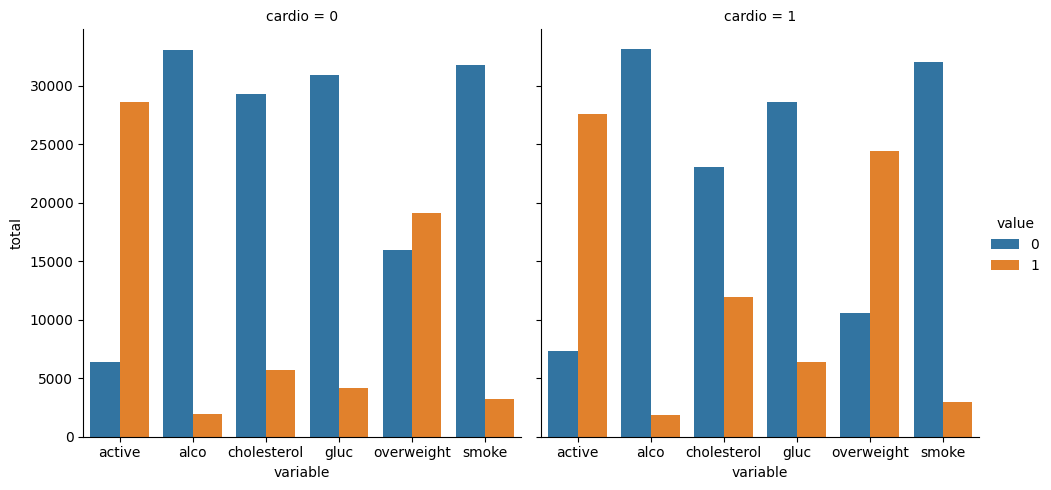

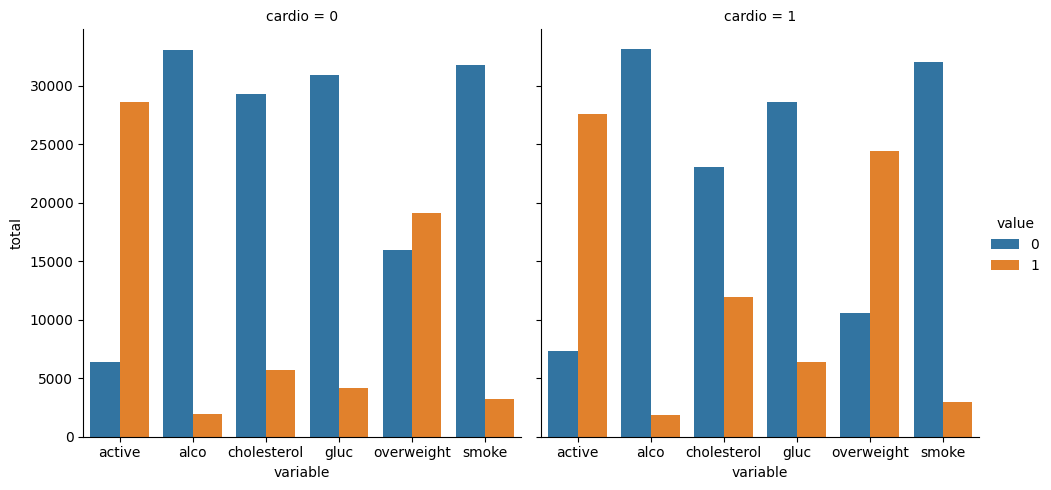

In [6]:
# Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value
def draw_catplot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
      # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename
      # one of the collumns for the catplot to work correctly
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
    df_cat = df_cat.rename(columns={0: 'total'})
    # Draw the catplot with 'sns.catplot()'
    graph = sns.catplot(data=df_cat, kind='bar', x="variable", y="total", hue="value", col="cardio")  
    fig = graph.fig
    fig.savefig('catplot.png')
    return fig

draw_catplot()    

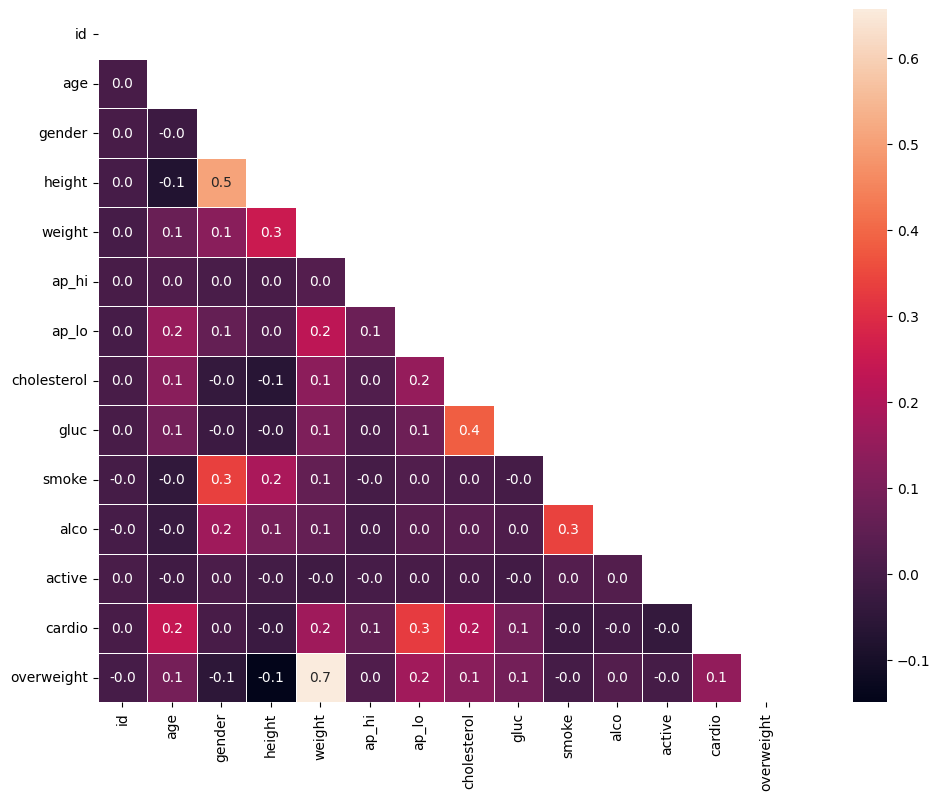

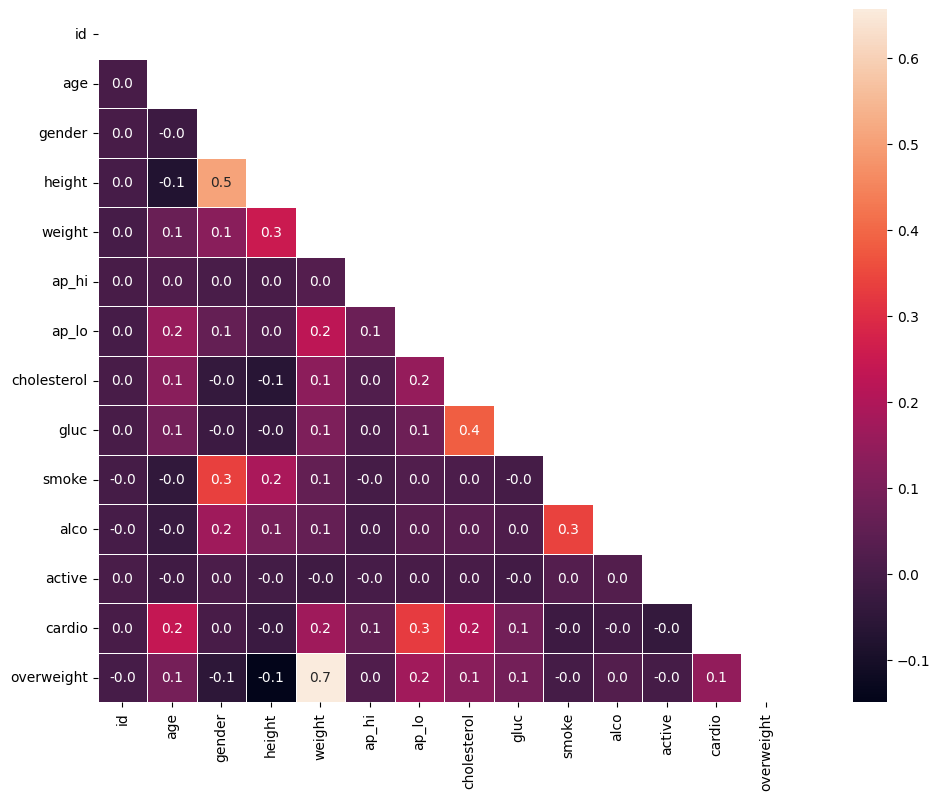

In [7]:
# Clean the data
def draw_heatmap():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))
                 ]
    corr = df_heat.corr() # Calculate the correlation matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Generate a mask for the upper triangle
    fig, ax = plt.subplots(figsize=(16,9))  # Set up the matplotlib figure
    sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt='0.1f') # Draw the heatmap with 'sns.heatmap()'
    fig.savefig('heatmap.png')
    return fig

draw_heatmap()